# <center>Python ML: Powering Social Ads Precision </center>

This project is about classifying Social Media ads means analysing the social media ads for finding the most profitable customers for the product who shows more inbterest in buying the product. Analysing helps to identify who or which group of people seems to like the product more because as we know how different is our taste from others.
for Example while analysing different age group we can see that those product that teanagers love may not be liked by the old-aged ones.
Likewise, a high-income person can afford to spend more on luxury goods than a low-income person. So this is how a business can determine whether a person will buy their product or not by classifying their social media ads.

The dataset contains a product’s social media advertising campaign with features as follows:

1. Age: specifies the age of the target audience
2. EstimatedSalary: the estimated salary of the target audience
3. Purchased:whether the target audience has purchased the product or not


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/social.csv")

In [4]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
df.shape

(400, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [120]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [19]:
col=['Age','EstimatedSalary','Purchased']
for i in col:
    print(f'{i}:{df[i].unique()}\n')

Age:[19 35 26 27 32 25 20 18 29 47 45 46 48 49 31 21 28 33 30 23 24 22 59 34
 39 38 37 42 40 36 41 58 55 52 60 56 53 50 51 57 44 43 54]

EstimatedSalary:[ 19000  20000  43000  57000  76000  58000  84000 150000  33000  65000
  80000  52000  86000  18000  82000  25000  26000  28000  29000  22000
  49000  41000  23000  30000  74000 137000  16000  44000  90000  27000
  72000  31000  17000  51000 108000  15000  79000  54000 135000  89000
  32000  83000  55000  48000 117000  87000  66000 120000  63000  68000
 113000 112000  42000  88000  62000 118000  85000  81000  50000 116000
 123000  73000  37000  59000 149000  21000  35000  71000  61000  75000
  53000 107000  96000  45000  47000 100000  38000  69000 148000 115000
  34000  60000  70000  36000  39000 134000 101000 130000 114000 142000
  78000 143000  91000 144000 102000 126000 133000 147000 104000 146000
 122000  97000  95000 131000  77000 125000 106000 141000  93000 138000
 119000 105000  99000 129000  46000  64000 139000]

Purchased:[0 1

Data is cleaned as there is no null values or missing values

## Exploratory Data Analysis

<Axes: >

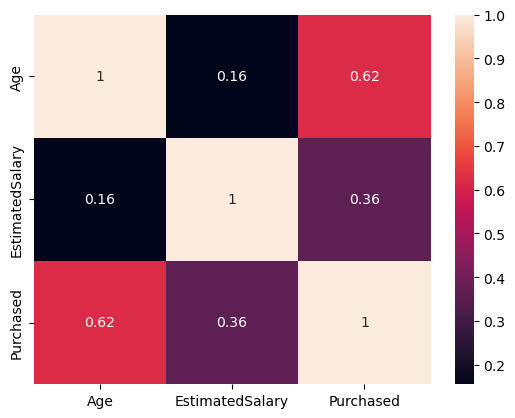

In [130]:
# correlation
sns.heatmap(df.corr(),annot=True)

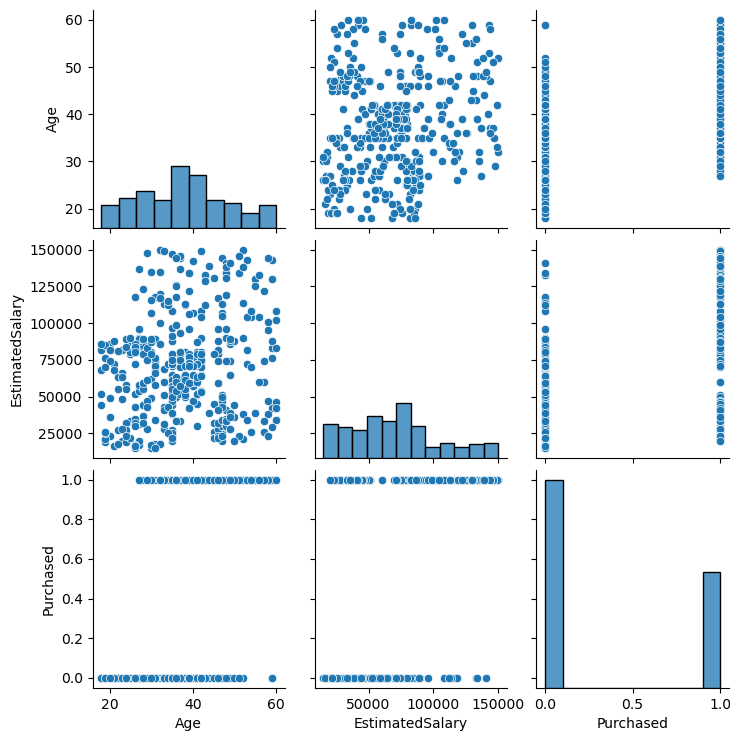

In [136]:
sns.pairplot(df,palette='#008080')

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

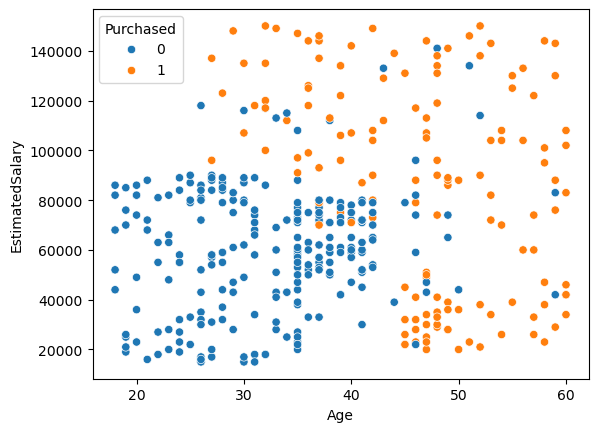

In [138]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=df,hue='Purchased')

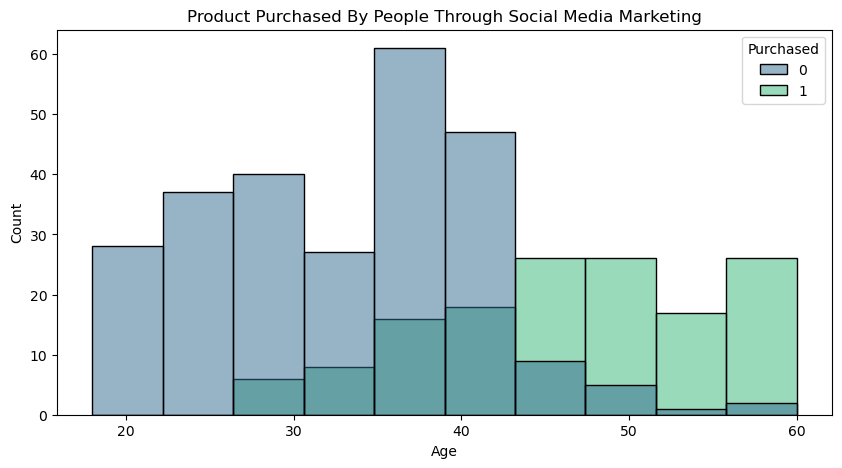

In [121]:
plt.figure(figsize=(10,5))
sns.histplot(x='Age',hue='Purchased',data=df,palette="viridis")
plt.title("Product Purchased By People Through Social Media Marketing")
plt.show()

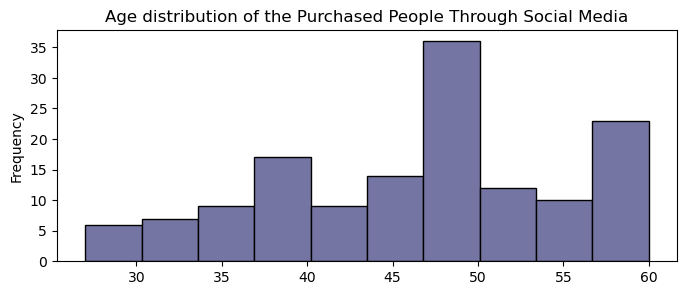

In [122]:
plt.figure(figsize=(8,3))
df.groupby('Purchased')['Age'].get_group(1).plot(kind='hist',x='Age',color='#7575a3',edgecolor='black')
plt.title('Age distribution of the Purchased People Through Social Media')
plt.show()

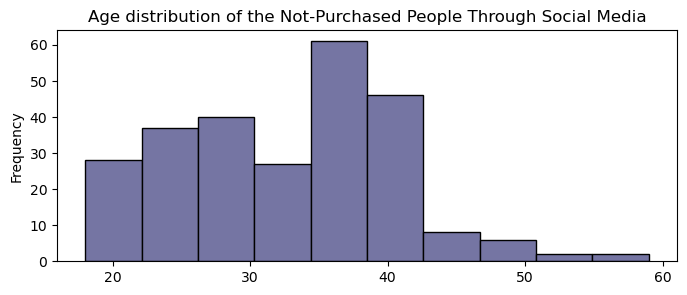

In [123]:
plt.figure(figsize=(8,3))
df.groupby('Purchased')['Age'].get_group(0).plot(kind='hist',x='Age',color='#7575a3',edgecolor='black')
plt.title('Age distribution of the Not-Purchased People Through Social Media')
plt.show()

<Axes: title={'center': 'Estimated Salary distribution'}, xlabel='EstimatedSalary', ylabel='Count'>

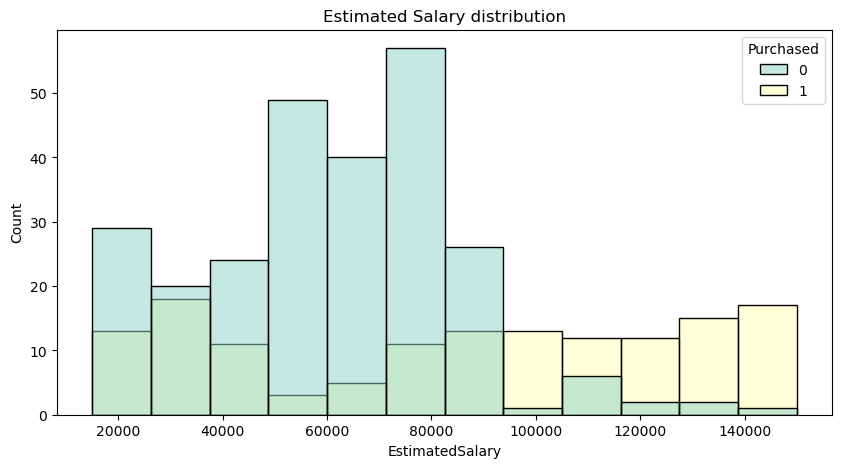

In [124]:
plt.figure(figsize=(10,5))
plt.title('Estimated Salary distribution')
sns.histplot(x='EstimatedSalary',data=df,hue='Purchased',palette='Set3')

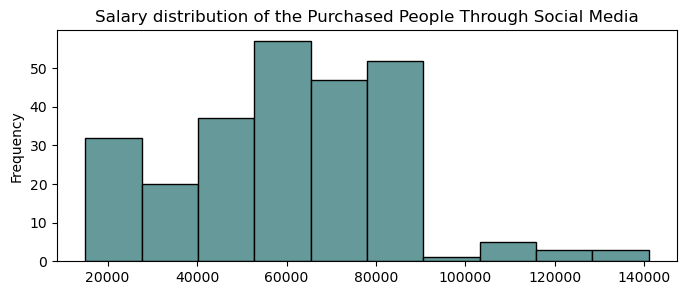

In [129]:
plt.figure(figsize=(8,3))
plt.title('Salary distribution of the Purchased People Through Social Media')
df.groupby('Purchased')['EstimatedSalary'].get_group(0).plot(kind='hist',color='#669999',edgecolor='black')
plt.show()

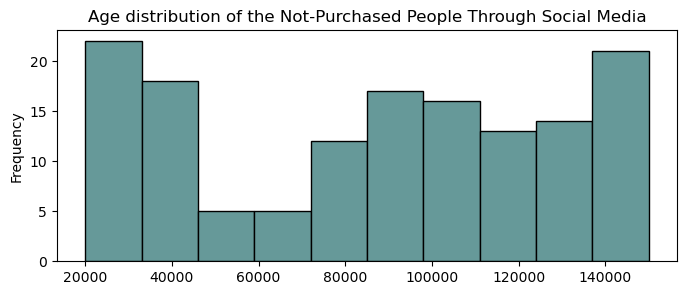

In [128]:
plt.figure(figsize=(8,3))
plt.title('Age distribution of the Not-Purchased People Through Social Media')
df.groupby('Purchased')['EstimatedSalary'].get_group(1).plot(kind='hist',color='#669999',edgecolor='black')
plt.show()

## Model Training

In [102]:
X = np.array(df[["Age", "EstimatedSalary"]])
y = np.array(df[["Purchased"]])

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=47)

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
model=RandomForestClassifier()

In [118]:
model.fit(Xtrain,ytrain)
predict=model.predict(Xtest)

In [119]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        47
           1       0.97      0.85      0.90        33

    accuracy                           0.93        80
   macro avg       0.93      0.91      0.92        80
weighted avg       0.93      0.93      0.92        80



In conclusion, the evaluation of the model's performance in predicting customer purchases reveals a robust capability, as indicated by high precision and recall scores, particularly for the "not purchased" class. The model demonstrates an ability to accurately classify instances where customers made purchases, achieving a precision of 97%, and effectively identifies instances where purchases were not made, with a precision of 90%. While the recall for the "purchased" class is slightly lower at 85%, indicating the model may miss some instances of actual purchases, the overall accuracy of 93% signifies its effectiveness in making correct predictions across both classes. These findings suggest that the model holds promise for assisting in customer purchase predictions, though further refinement may be beneficial to enhance recall performance for the "purchased" class.